### 10년치 데이터 가져오기

In [67]:
import FinanceDataReader as fdr
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = fdr.DataReader('GOOG', start='2012-10-31', end='2022-10-31')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-31,16.933031,16.961424,16.811985,16.943991,16.943991,61710442
2012-11-01,16.924065,17.208000,16.904636,17.125559,17.125559,82311371
2012-11-02,17.304888,17.323816,17.120081,17.133778,17.133778,93324497
2012-11-05,17.048597,17.107376,16.825932,17.010241,17.010241,65681270
2012-11-06,17.073006,17.098412,16.875496,16.979357,16.979357,63549309
...,...,...,...,...,...,...
2022-10-24,102.089996,103.099998,100.300003,102.970001,102.970001,24680800
2022-10-25,103.300003,105.099998,103.019997,104.930000,104.930000,29910200
2022-10-26,96.760002,98.540001,94.570000,94.820000,94.820000,71504300


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-10-31 to 2022-10-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [69]:
df['Adj Close'][df['Volume']==0]

Series([], Name: Adj Close, dtype: float64)

#### 시계열 데이터, 이동평균, 이동표준편차 시각화

In [70]:
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()

    plt.figure(figsize=(10,6))
    plt.xlabel('Date')
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolmean, color='red', label=f'Rolling mean {interval}')
    plt.plot(rolstd, color='black', label=f'Rolling std {interval}')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Std')
    plt.show()

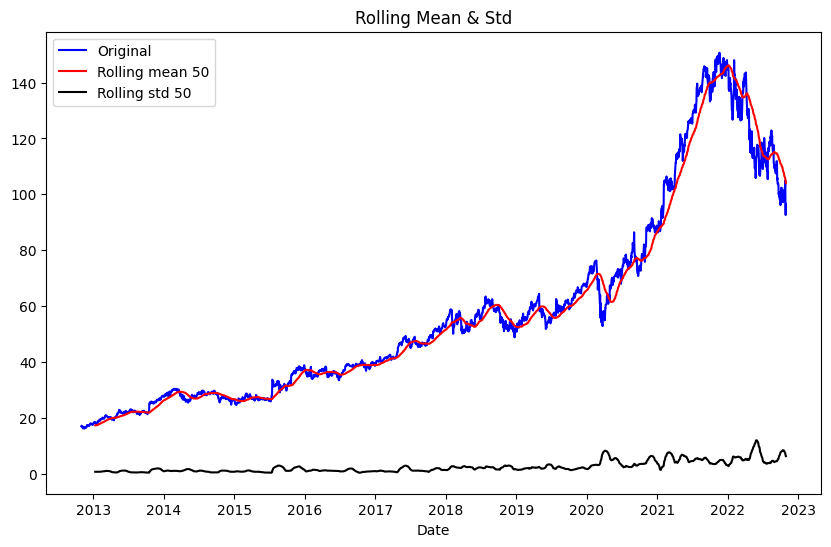

In [71]:
plot_rolling(df['Adj Close'], 50)

### 정상성 데이터 확인 ADF 테스트

In [72]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Adj Close'].values)

In [73]:
result

(-0.772851369042787,
 0.8269670022786417,
 24,
 2492,
 {'1%': -3.432976825339513,
  '5%': -2.862700515844509,
  '10%': -2.5673877878037974},
 8123.380743513813)

In [74]:
print(f'p-value : {result[1]}')

p-value : 0.8269670022786417


<Axes: xlabel='Date'>

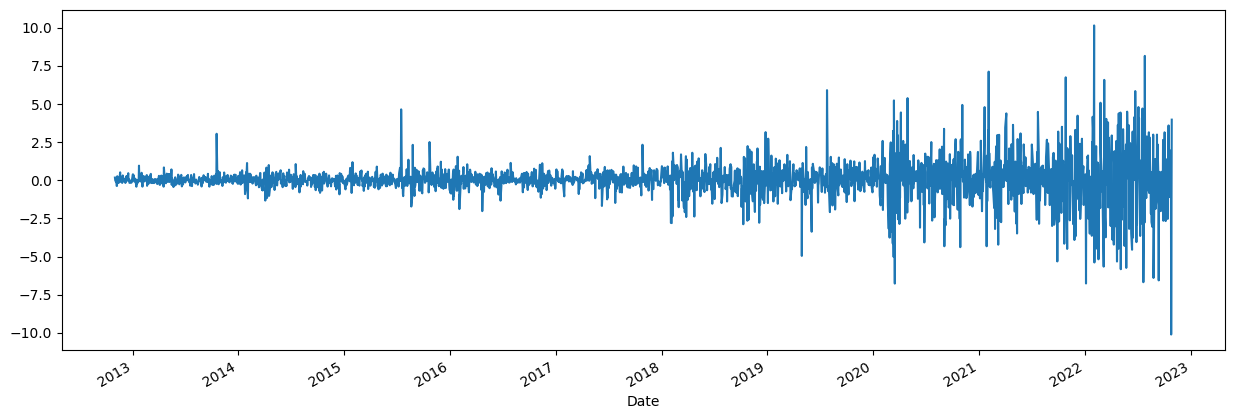

In [75]:
df_diff1 = df['Adj Close'].diff(1).dropna()
df_diff1.plot(figsize=(15, 5))

In [76]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_diff1)

In [77]:
result

(-10.592715831383453,
 6.465795683946909e-19,
 23,
 2492,
 {'1%': -3.432976825339513,
  '5%': -2.862700515844509,
  '10%': -2.5673877878037974},
 8119.7182547234825)

In [78]:
print(f'p-value : {result[1]}')

p-value : 6.465795683946909e-19


#### ACF, PACF로 AR, MA 확인

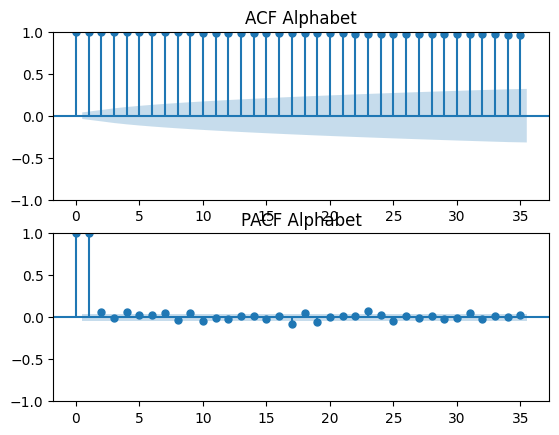

In [79]:
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt

## Close
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df['Adj Close'], ax=ax1)
ax1.set_title("ACF Alphabet")


sgt.plot_pacf(df['Adj Close'], method = ('ols'), ax=ax2)
ax2.set_title("PACF Alphabet")

plt.show()

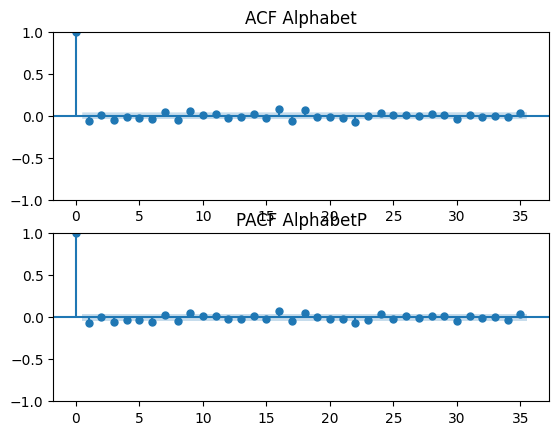

In [80]:
import statsmodels.graphics.tsaplots as sgt 
import matplotlib.pyplot as plt

## Close
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df_diff1, ax=ax1)
ax1.set_title("ACF Alphabet")


sgt.plot_pacf(df_diff1, method = ('ols'), ax=ax2)
ax2.set_title("PACF AlphabetP")

plt.show()

#### pmdarma 활용

In [81]:
import pmdarima as pm
from pmdarima.arima import ndiffs
# 차분을 몇 번 하면 적당한지 알려주는 함수
n_diffs = ndiffs(df['Adj Close'])
n_diffs

1

##### pmdarima.arima.auto_arima
- pmdarima.arima.auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)

In [82]:
model = pm.auto_arima(y=df['Adj Close'],
              d=1,
              start_p = 0, max_p = 3,
              start_q = 0, max_q = 3,
              seasonal=False,
              trace=True
             )
# 자동결정 함수
# AIC는 평가지표 - feature 개수를 줄인다

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8231.556, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8221.824, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8221.860, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8231.192, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8223.799, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8223.097, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8225.820, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8221.686, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8223.648, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8222.890, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8221.739, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8224.664, Time=0.47 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.643 seconds


In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2517
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -4108.843
Date:                Thu, 05 Oct 2023   AIC                           8221.686
Time:                        10:51:40   BIC                           8233.347
Sample:                             0   HQIC                          8225.918
                               - 2517                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0677      0.011     -6.070      0.000      -0.090      -0.046
sigma2         1.5346      0.018     87.291      0.000       1.500       1.569
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10915.24
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              20.60   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

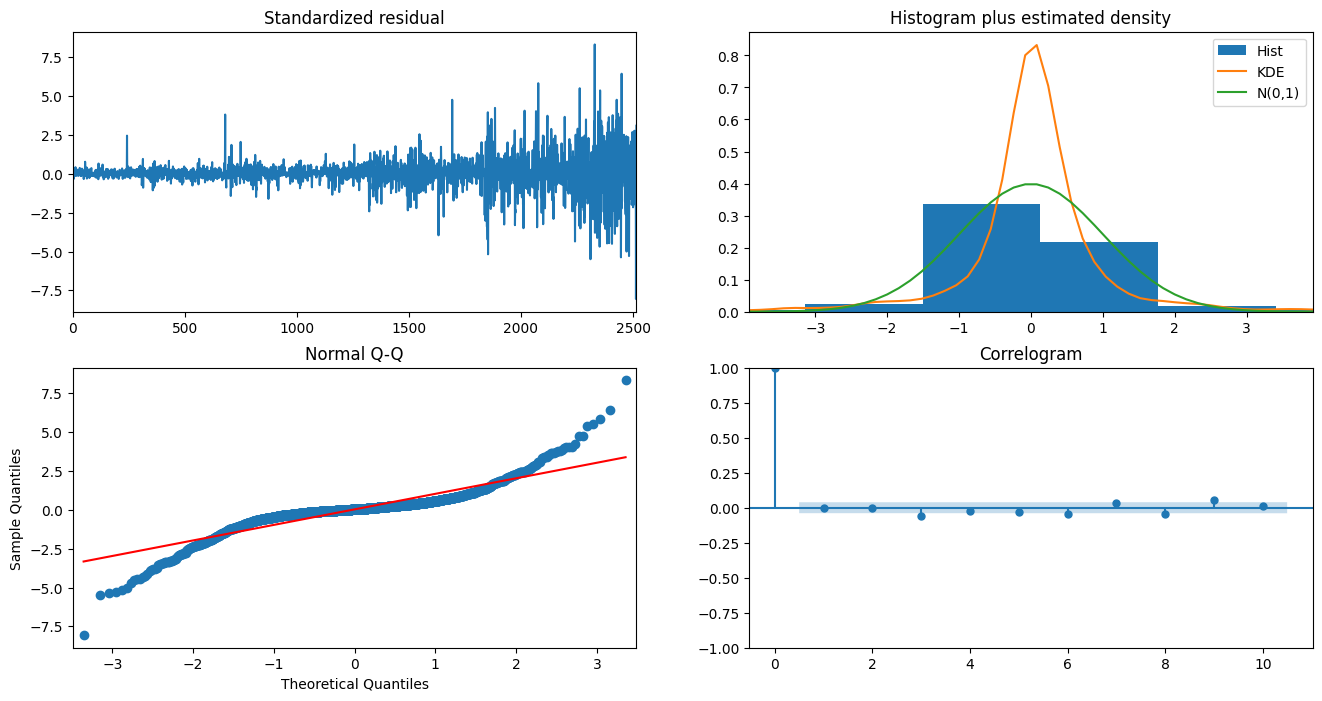

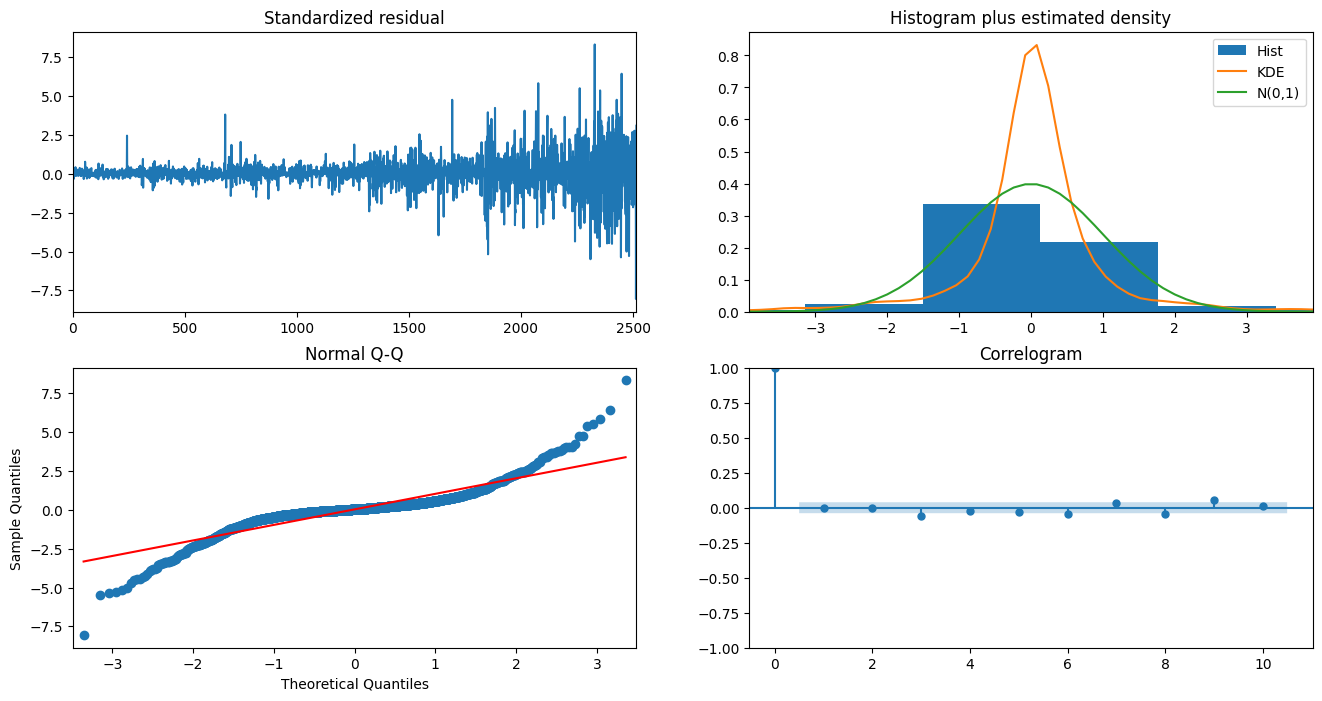

In [84]:
model.plot_diagnostics(figsize=(16,8))

#### ARIMA model 학습과 테스트 

In [85]:
# train, test set 분리
train_data, test_data = df['Adj Close'][:int(len(df['Adj Close'])*0.9)], df['Adj Close'][int(len(df['Adj Close'])*0.9):]

In [86]:
train_data.tail()

Date
2021-10-22    138.625000
2021-10-25    138.772995
2021-10-26    139.671997
2021-10-27    146.427505
2021-10-28    146.128998
Name: Adj Close, dtype: float64

In [87]:
# train_data 학습
model = pm.auto_arima(y=train_data,
              d=1,
              start_p = 0, max_p = 3,
              start_q = 0, max_q = 3,
              seasonal=False,
              trace=True
             )
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6127.619, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6119.112, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6119.471, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6134.024, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6120.306, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6118.765, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6120.764, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6120.763, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6120.804, Time=0.24 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6120.503, Time=1.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6126.014, Time=0.20 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.932 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3055.382
Date:                Thu, 05 Oct 2023   AIC                           6118.765
Time:                        10:51:47   BIC                           6141.664
Sample:                             0   HQIC                          6127.120
                               - 2265                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0851      0.028      3.000      0.003       0.030       0.141
ar.L1         -0.4906      0.106     -4.650      0.000      -0.697      -0.284
ma.L1          0.4247      0.108      3.915      0.000       0.212       0.637
sigma2         0.8704      0.011     82.185      0.000       0.850       0.891
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9707.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.78   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
pred = model.predict(len(test_data))

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [89]:
test_data.index

DatetimeIndex(['2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11',
               ...
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [90]:
pred_ = pd.Series(list(pred), index=test_data.index)

In [91]:
# pred.index = test_data.index
# pred.index

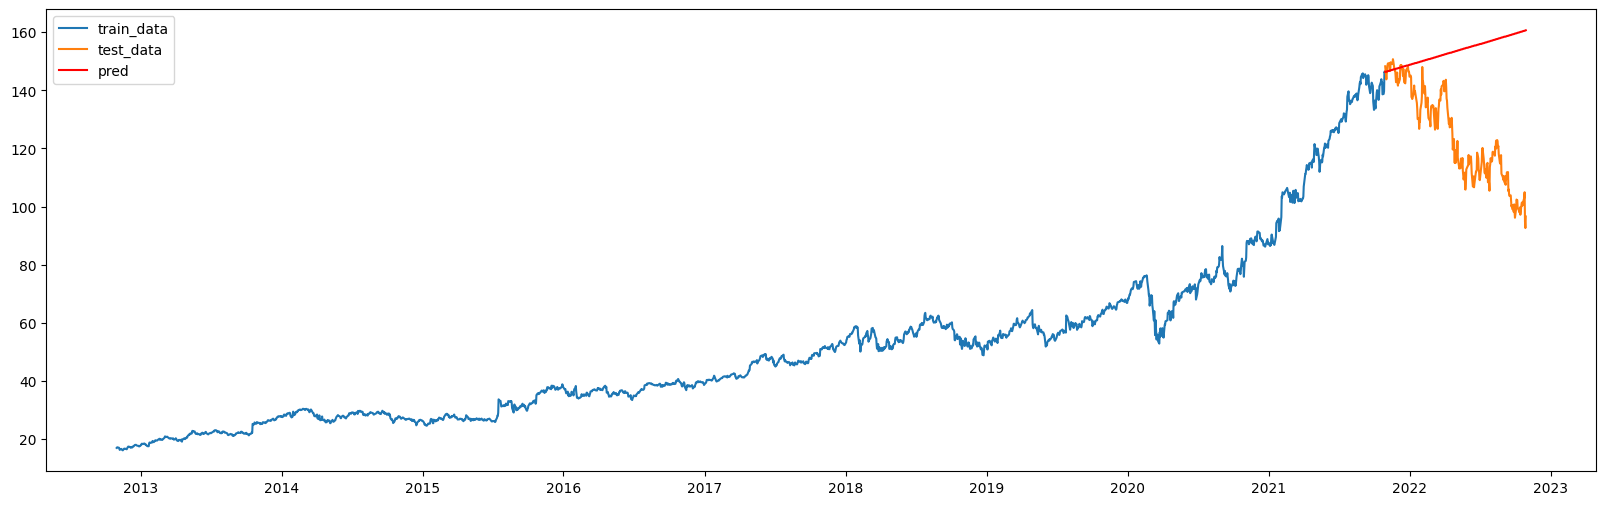

In [92]:
# train_data, test_data, pred plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, label='test_data')
plt.plot(pred_, c='red', label='pred')
plt.legend(loc='best')
plt.show()

In [93]:
# forecast 함수
def forecast_n_step(model, n=1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    return (fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n])

def forecast(length, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []
    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(length):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

In [94]:
# 예측
fc, upper, lower = forecast(len(test_data), model, index=test_data.index, data=test_data)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [95]:
upper_series = pd.Series(upper, index=test_data.index)
lower_series = pd.Series(lowwer, index=test_data.index)

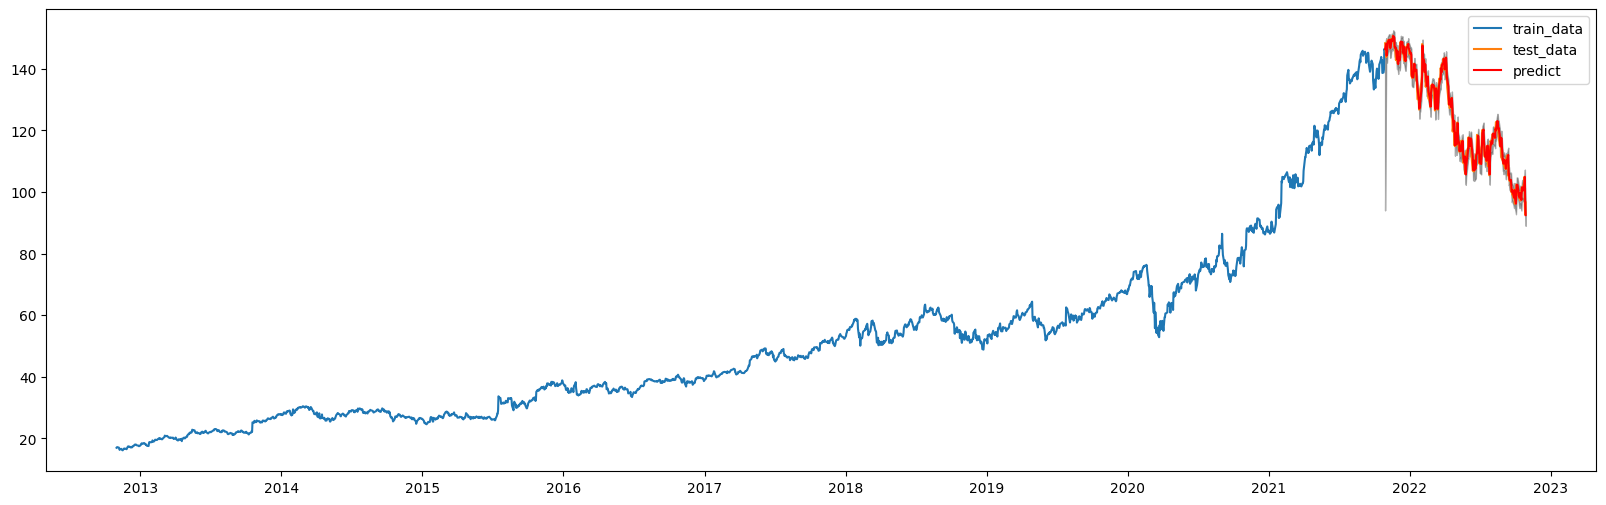

In [96]:
# train_data, test_data, pred plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, label='test_data')
plt.plot(fc, c='red', label='predict')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.30)
plt.legend(loc='best')
plt.show()

### 평가

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: ' ,'{:.2f}%'.format(mape*100))

MSE:  4.44106325851667e+128
MAE:  4.208773200918523e+63
RMSE:  2.107383035548277e+64
MAPE:  11709.59%


In [99]:
import statsmodels.api as sm
model_ = sm.tsa.arima.ARIMA(train_data, order=(1, 1, 1))
model_fit = model_.fit()
model_fit.forecast(len(test_data))

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is availab

2265    146.335528
2266    146.232054
2267    146.283895
2268    146.257922
2269    146.270935
           ...    
2512    146.266592
2513    146.266592
2514    146.266592
2515    146.266592
2516    146.266592
Name: predicted_mean, Length: 252, dtype: float64

In [ ]:
sm.tsa.stats